# Web Information Retrieval
## Introduction to search engines

### DAY 1: Student version
### Introduction & First Steps

The goal of this first day is to go through the data and propose some ideas for the creation of your first search engine.

The notebook is divided into several steps:
- Query on the data
- Data extraction
- Data exploration
- Data Visualization
- Ideas suggestion for the search engine

The data are from the stack exchange forum. They are available here : https://archive.org/details/stackexchange


In order to gain time, you can already download 7 zip file of datascience forum (datascience.stackexchange.com.7z). If you work on Colab, we suggest you to push it on a specific directory (it may take few minutes to load).





# Query on the data

Perform SQL queries to explore the data on the surface.

The queries are to be done directly from this link: https://data.stackexchange.com/datascience/query/new

For each query, you must test it on the site and then rewrite it in the associated cell. A capture of the results and a comment is requested in the report.

You can find a cheat sheet on SQL basic syntax at: https://res.cloudinary.com/dyd911kmh/image/upload/v1675360372/Marketing/Blog/SQL_Basics_For_Data_Science.pdf


In [4]:
# How many lines are in the Posts, Tags, Comments tables ?

import os

path_to_folder = "/home/lucien/datascience.stackexchange.com"

L = ['Posts.xml', 'Tags.xml', 'Comments.xml']
count_lines = {}

for filename in os.listdir(path_to_folder):
    if filename in L:
        with open(os.path.join(path_to_folder, filename)) as f:
            count_lines[filename] = len(f.readlines())
print(count_lines)

{'Posts.xml': 75730, 'Tags.xml': 682, 'Comments.xml': 78176}


In [5]:
# How many comments have there been since the beginning of the year 2023? 
#on veit compter le nombre de balises row à l'interieur des balises comments de Comments.xml

import xml.etree.ElementTree as ET

path_to_comments = "/home/lucien/datascience.stackexchange.com/Comments.xml"

count_comments = 0

for event, elem in ET.iterparse(path_to_comments):
    if elem.tag == "row":
        if int(elem.attrib["CreationDate"][0:4]) >= 2023:
            count_comments += 1

print('Le nombre de commentaires est de :', count_comments)

Le nombre de commentaires est de : 1082


In [6]:
# How many users are there ?

path_to_users = "/home/lucien/datascience.stackexchange.com/Users.xml"

count_users = 0

for event, elem in ET.iterparse(path_to_users):
    if elem.tag == "row":
        count_users += 1

print('Le nombre d\'utilisateurs est de :', count_users)

Le nombre d'utilisateurs est de : 125306


In [7]:
# How many new users are there each year since 2020 ?

path_to_users = "/home/lucien/datascience.stackexchange.com/Users.xml"

count_users = 0

for event, elem in ET.iterparse(path_to_users):
    if elem.tag == "row":
        if int(elem.attrib["CreationDate"][0:4]) >= 2020:
            count_users += 1
print('Le nombre de nouveaux utilisateurs est de :', count_users)

Le nombre de nouveaux utilisateurs est de : 52539


In [8]:
# What is the Content of the smallest Post ?

path_to_posts = "/home/lucien/datascience.stackexchange.com/Posts.xml"

min_size = 1000000

for event, elem in ET.iterparse(path_to_posts):
    if elem.tag == "row":
        if len(elem.attrib["Body"]) < min_size:
            min_size = len(elem.attrib["Body"])
            content = elem.attrib["Body"]

print(min_size)
print(content)

0



In [9]:
# What is the most voted post ?

path_to_votes = "/home/lucien/datascience.stackexchange.com/Votes.xml"

count = {}


for event, elem in ET.iterparse(path_to_votes):
    if elem.tag == "row":
        if elem.attrib["PostId"] in count:
            count[elem.attrib["PostId"]] += 1
        else:
            count[elem.attrib["PostId"]] = 1

#on veut trier le dictionnaire count par valeur décroissante

sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=True)
print(sorted_count[0])


('24051', 456)


In [10]:
# What are the 10 most frequent tags in 2022? (ordered from most to least frequent)

path_to_post = "/home/lucien/datascience.stackexchange.com/Posts.xml"

count = {}

for event, elem in ET.iterparse(path_to_post):
    if elem.tag == "row":
        if int(elem.attrib["CreationDate"][0:4]) == 2022:
            try:
                if elem.attrib["Tags"] in count:
                    count[elem.attrib["Tags"]] += 1
                else:
                    count[elem.attrib["Tags"]] = 1
            except:
                pass

#on veut trier le dictionnaire count par valeur décroissante

sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=True)

print(sorted_count[0:9])

[('<machine-learning>', 48), ('<python>', 27), ('<nlp>', 20), ('<deep-learning>', 19), ('<python><pandas>', 18), ('<time-series>', 16), ('<logistic-regression>', 15), ('<dataset>', 13), ('<neural-network>', 13)]


## Initialize the environnement

In [11]:
## Install the library for extracting 7 zip file
!pip install py7zr --quiet

/bin/bash: /home/lucien/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [12]:
## Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import py7zr
import os

ModuleNotFoundError: No module named 'matplotlib'

There is a simple method for extracting the data directly from the website zip repo. It writes the different files directly in your google drive.

In [ ]:
# Only if you use Colab

drive.mount('/content/drive')

In [ ]:
# To adapt to your Drive/local directory

MAIN_PATH = '/content/drive/MyDrive/TP Centrale'
DATA_PATH = '/content/drive/MyDrive/TP Centrale/data'

In [ ]:
if not os.path.isdir(MAIN_PATH):
  os.mkdir(MAIN_PATH)
if not os.path.isdir(MAIN_PATH):
  os.mkdir(DATA_PATH)

In [ ]:
archive = py7zr.SevenZipFile(os.path.join(MAIN_PATH, 'datascience.stackexchange.com.7z'), mode='r')
archive.extractall(path=os.path.join(MAIN_PATH, 'data'))
archive.close()

## Data Extraction

The data is in XML format. Why do you think the developers preferred this format? What could have been other possible formats? (**answer expected in the report**)

Here is what a raw file looks like:


In [ ]:
with open(os.path.join(DATA_PATH, 'Tags.xml'), 'r') as f:
  raw_xml = f.read()
print(raw_xml)

NameError: name 'DATA_PATH' is not defined

### XML Extraction example for Tags file
Here is a method to read these XML files easily as a pandas DataFrame.

In [ ]:
tags = pd.read_xml(os.path.join(DATA_PATH, 'Tags.xml'), parser="etree", encoding="utf8")

In [ ]:
tags

There are several other files in the extracted folder:

In [ ]:
os.listdir(DATA_PATH)

In the next part you will do some exploration on them, starting with the more important one: Posts.xml. It contains the many posts of the selected topic: "data science".

## Data Exploration

In this part, you have to work on Posts.xml file.


You can find a cheat sheet of pandas basic syntax at: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [ ]:
# Open the Posts.xml file
import pandas as pd
posts = pd.read_xml(os.path.join('/home/lucien/datascience.stackexchange.com/Posts.xml'), parser="etree", encoding="utf8")
posts

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName,FavoriteCount
0,5,1,2014-05-13T23:58:30.457,9,898.0,<p>I've always been interested in machine lear...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,...,2014-05-14T14:40:25.950,CC BY-SA 3.0,NaN,NaN,None,NaN,None,None,None,NaN
1,7,1,2014-05-14T00:11:06.457,4,478.0,"<p>As a researcher and instructor, I'm looking...",36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,...,2014-05-14T08:40:54.950,CC BY-SA 3.0,10.0,97.0,2014-05-16T13:45:00.237,NaN,None,None,None,NaN
2,9,2,2014-05-14T00:36:31.077,5,NaN,"<p>Not sure if this fits the scope of this SE,...",51.0,2014-05-14T00:36:31.077,None,None,...,None,CC BY-SA 3.0,NaN,NaN,None,5.0,None,None,None,NaN
3,10,2,2014-05-14T00:53:43.273,13,NaN,"<p>One book that's freely available is ""The El...",22.0,2014-05-14T00:53:43.273,None,None,...,None,CC BY-SA 3.0,NaN,NaN,None,7.0,None,None,None,NaN
4,14,1,2014-05-14T01:25:59.677,26,1901.0,<p>I am sure data science as will be discussed...,66.0,2020-08-16T13:01:33.543,Is Data Science the Same as Data Mining?,<data-mining><definitions>,...,None,CC BY-SA 3.0,29.0,322.0,2014-06-17T16:17:20.473,NaN,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75722,119962,1,2023-03-04T20:06:06.820,0,8.0,<p>I am implementing a neural network of arbit...,147597.0,2023-03-04T20:22:12.523,Back Propagation on arbitrary depth network wi...,<neural-network><backpropagation>,...,None,CC BY-SA 4.0,NaN,147597.0,2023-03-04T20:22:12.523,NaN,None,None,None,NaN
75723,119963,1,2023-03-04T20:12:19.677,0,10.0,<p>I am using KNN for a regression task</p>\n<...,147598.0,2023-03-04T20:12:19.677,Evaluation parameter in knn,<regression><k-nn>,...,None,CC BY-SA 4.0,NaN,NaN,None,NaN,None,None,None,NaN
75724,119964,1,2023-03-05T00:14:12.597,0,7.0,<p>I have developed a small encoding algorithm...,44581.0,2023-03-05T00:14:12.597,Can I use zero-padded input and output layers ...,<deep-learning><convolutional-neural-network>,...,None,CC BY-SA 4.0,NaN,NaN,None,NaN,None,None,None,NaN
75725,119965,1,2023-03-05T00:43:12.213,0,5.0,"<p>To my understanding, optimizing a model wit...",84437.0,2023-03-05T00:43:12.213,Why does cross validation and hyperparameter t...,<cross-validation><hyperparameter-tuning>,...,None,CC BY-SA 4.0,NaN,NaN,None,NaN,None,None,None,NaN


In [ ]:
# What is the size of this file ?

La taille est 123,5 Mo

In [ ]:
# What is the schema of the posts table ?
<row Id="39288" PostTypeId="2" ParentId="28232" CreationDate="2018-10-06T23:22:20.493" Score="-2" Body="&lt;p&gt;A common complaint about Python’s syntax is that it’s impossible to generate Python code on the fly, from a program.&#xA;If you want, use Rcmdr (R pkg) to do your analysis and machine learning. You can export the output AND THE CODE. &#xA;I use since long time the two languages. Python is powerful but it has this black point. &lt;/p&gt;&#xA;" OwnerUserId="60297" LastEditorUserId="29575" LastEditDate="2018-10-06T23:43:15.247" LastActivityDate="2018-10-06T23:43:15.247" CommentCount="1" ContentLicense="CC BY-SA 4.0" />

#Parfois il peut aussi y avoir de sbalises tag

In [ ]:
# Give the mean number of new posts by user 

#calculons le nombre de posts par utilisateur, repérés par OwnerUserId avec newpost signifie PostTypeId=1

#comptons le nombre de posts par utilisateur qui ont PostTypeId=1

users = {}
for user in posts['OwnerUserId']:
  #on regarde la colonne PostTypeId sur la même ligne que OwnerUserId
  try:
    if posts['PostTypeId'][user] == 1:
        if user in users:
            users[user] += 1
        else:
            users[user] = 1
  except:
     pass


#calculons la moyenne

sum = 0

for user in users:
  sum += users[user]

print(sum/len(users))


3.6972332015810276


In [ ]:
# Run some other queries to get a better understanding of the "Posts" table

## Data Visualization 

Exploring data only through queries has its limits. 

An important step in understanding the data is in the visualization. It is important to think about what information I want to put forward and how.

You have the matplotlib and seaborn libraries available:
- https://matplotlib.org/stable/index.html
- https://seaborn.pydata.org/


You can find some cheatsheets at:
 - for matplotlib: https://matplotlib.org/cheatsheets/
 - for seaborn: https://res.cloudinary.com/dyd911kmh/image/upload/v1676302629/Marketing/Blog/Seaborn_Cheat_Sheet.pdf


#### Example of matplotlib use

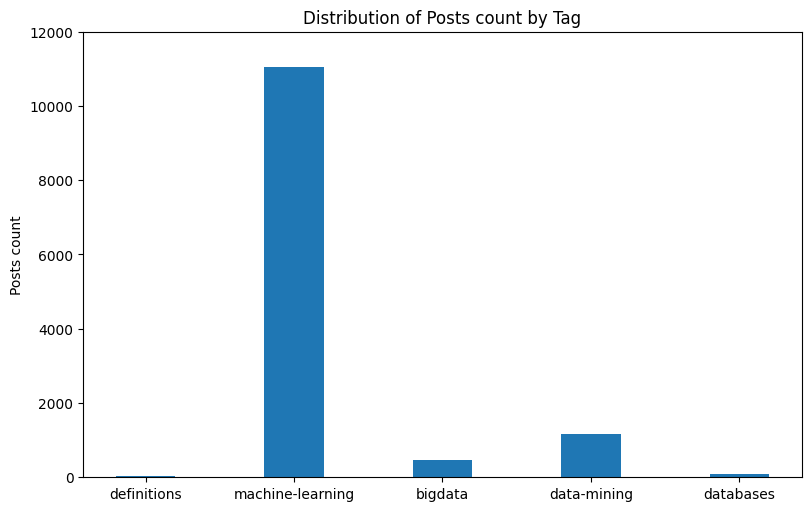

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tags = pd.read_xml(os.path.join('/home/lucien/datascience.stackexchange.com/Tags.xml'), parser="etree", encoding="utf8")

tags_5 = tags.head(5)

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

plt.bar(x=tags_5["TagName"], height=tags_5["Count"], width=0.4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posts count')
ax.set_title('Distribution of Posts count by Tag')
ax.set_ylim(0, 12_000)

plt.show()

#### Example of seaborn use

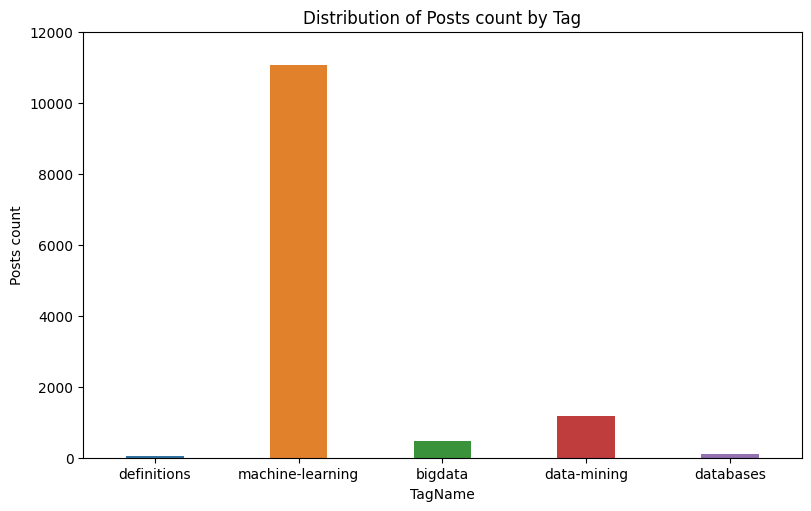

In [16]:
tags_5 = tags.head(5)

fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')

sns.barplot(x=tags_5["TagName"], y=tags_5["Count"], width=0.4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Posts count')
ax.set_title('Distribution of Posts count by Tag')
ax.set_ylim(0, 12_000)

plt.show()

These were 2 examples of distribution visualization via histograms.

On Seaborn, several types of fairly intuitive graphs are available. They are classified by type of input data:
- Visualize 2 continuous variables: relplot
- Visualize 1 continuous variable in relation to a categorical variable: displot
- Visualize 2 categorical variables : catplot

![image.png](https://seaborn.pydata.org/_images/function_overview_8_0.png)


More examples can be found here : https://seaborn.pydata.org/tutorial/function_overview.html


Text(0.5, 1.0, 'Distribution of the number of users by new posts number')

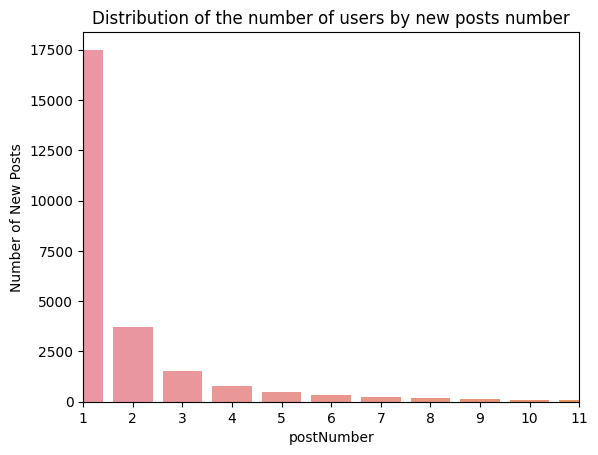

In [18]:
# Viz 1 : Plot the distribution of number of posts created by users

# Directly use histplot takes too long because of the number of users.
# Better to aggregate and then use barplot

# Doesn't take into account users that have never created posts
posts = pd.read_xml(os.path.join('/home/lucien/datascience.stackexchange.com/Posts.xml'), parser="etree", encoding="utf8")

posts_count = posts.groupby("OwnerUserId", as_index=False)["Id"].count()
posts_count = posts_count.rename(columns={"Id": "postNumber"})
posts_count_number = posts_count.groupby("postNumber", as_index=False).count()

sns.barplot(x="postNumber", y="OwnerUserId", data=posts_count_number)
plt.xlim((0, 10))
plt.ylabel("Number of New Posts")
plt.title("Distribution of the number of users by new posts number")

Text(0.5, 1.0, 'Distribution of the new posts number by months')

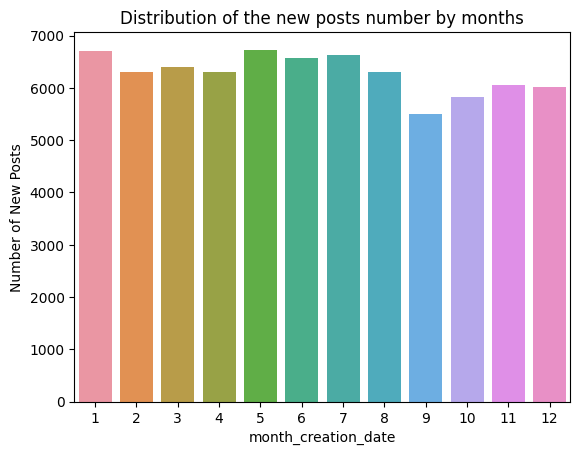

In [19]:
# Viz 2 : Plot the distribution of number of posts by months
posts["month_creation_date"] = pd.to_datetime(posts.CreationDate).dt.month

posts_by_month = posts.groupby("month_creation_date", as_index=False)["OwnerUserId"].count()

sns.barplot(x="month_creation_date", y="OwnerUserId", data=posts_by_month)
plt.ylabel("Number of New Posts")
plt.title("Distribution of the new posts number by months")

/tmp/ipykernel_5190/1895595320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_sup2020["nbCaracters"] = posts_sup2020.Body.str.len()


Text(0.5, 1.0, 'Distribution of the number of characters by posts and by users')

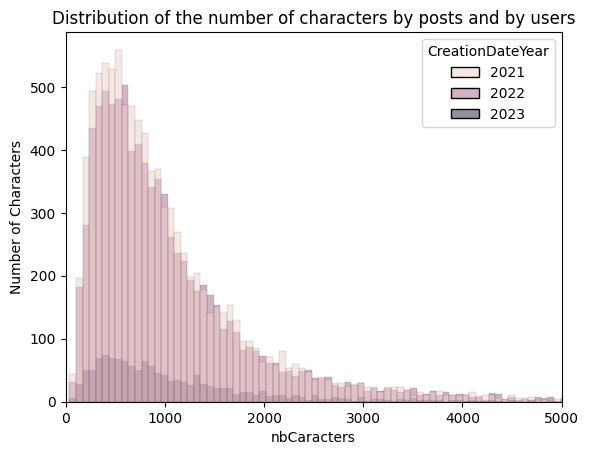

In [20]:
# Viz 3 : Plot the distribution of number of characters by posts and by year starting from 2020
posts["CreationDateYear"] = pd.to_datetime(posts.CreationDate).dt.year

posts_sup2020 = posts[posts.CreationDateYear > 2020]

posts_sup2020["nbCaracters"] = posts_sup2020.Body.str.len()

sns.histplot(x="nbCaracters", hue="CreationDateYear", data=posts_sup2020)
plt.xlim((0, 5000))
plt.ylabel("Number of Characters")
plt.title("Distribution of the number of characters by posts and by users")

In [ ]:
# Add other visualization figures that can help you to decide the search engine architecture

## Exploring Other Files

The purpose of this part is to understand the other files using the same process and data collection site: https://archive.org/details/stackexchange

You will describe the purpose and content of each file to show your understanding of the subject. You will also make a relational diagram of the different tables directly in the report.

In [ ]:
# Open, explore and visualize other XML files to suggest features for your search engines

## Suggest ideas for the search engine

Using your work and knowledge of this database, propose a structure for your search engine in the report. You do not need to code it entirely yet, simply write down some ideas you may already have on how you could build a great search engine, which data to use and how to use it.

Reminder: The aim is to provide a search engine able to find information from any of the files with textual data in it (posts, comments, ...) on the datascience topic. Some files might be better than others when it comes to searching for information, some metadata could be used aswell... 

IDEAS:
-recherche par mots clés où les ots clés sont des tags associés aux articles. On accorde plus de poids au correspondance de mots entre la recherche et les tags s'il y a bien correspondance
-pour les autres correspondance (mot de la publication et mot de la recherche) on utilise un poids normal
-on propose en priorité les articles les plus récentes s'ils y a environ la même correspondance
-plus de poids selon nombre de like, vues, commentaires

INDEX

-->index inversé: en clé les mots clés et en valeur les articles qui contiennent ces mots là (premiers dic)

-->index à terme de fréquence: même principe que l'index inversé mais en pllus d'associé l'article à un mot il associe aussi la fréquence d'apparition des mots

Pour la segmentation de texte: on séparer sur les espaces, on garde seulement le radical etc...
Gros algo pour bien vectoriser: BPE, SentencePiece, WordPiece (tous dans le module transformer)

AVANT TOKÉNISER LA QUERY DE LA MÊME MANIÈRE QUE L'ON A UTILISER POUR TOKÉNISER LE TEXTE

Outil à utiliser: 
import transformer
tokenizer = Autotenizer.from_pretrained("camembert-base") #pour langue française
Puis tokenizer.tokenize("rentrer string de caractères)

RECHERCHE

--> recherche par count: on compte le nombre de mot en commun entre la requête et les documents et prendre ceux avec le plus de doc (le plus basique)

--> recherche booléenne

--> recherche probabiliste